In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, accuracy_score, classification_report

In [2]:
d = pd.read_excel('/content/DM_Sales.xls')

In [3]:
d.sample(5)

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,...,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
16893,12945,3070,16,417,2017-07-08 00:00:00,1.0,Approved,Norco Bicycles,Standard,high,...,Brambley,Female,37,Biostatistician IV,Argiculture,Mass Customer,N,No,15.0,1663587050985623040
979,3004,19019,15,500,2017-10-16 00:00:00,1.0,Approved,Norco Bicycles,Standard,low,...,Crathern,Male,19,Recruiting Manager,Retail,Affluent Customer,N,Yes,10.0,996233450985623040
18586,5548,1376,23,2924,2017-07-16 00:00:00,0.0,Cancelled,Norco Bicycles,Mountain,low,...,McLaughlin,Female,79,Assistant Media Planner,Entertainment,Mass Customer,N,Yes,6.0,1129030250985623040
17679,8961,2283,56,2844,2017-02-21 00:00:00,0.0,Approved,OHM Cycles,Standard,medium,...,Felgate,Female,98,NaN,Financial Services,Mass Customer,N,Yes,13.0,1513337450985623040
2385,7222,17609,13,1641,2017-10-28 00:00:00,1.0,Approved,Solex,Standard,medium,...,Sturgeon,Male,29,Community Outreach Specialist,Financial Services,Mass Customer,N,No,14.0,1615030250985623040


In [4]:
d.isna().sum()

index                                     0
transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                            359
order_status                              0
brand                                   194
product_line                            194
product_class                           194
product_size                            194
list_price                                0
standard_cost                           194
product_first_sold_date                 194
address                                   0
postcode                                  0
state                                     0
property_valuation                        0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
job_title                       

In [5]:
d.nunique()

index                                  19959
transaction_id                         19959
product_id                               101
customer_id                             3488
transaction_date                         364
online_order                               2
order_status                               2
brand                                      6
product_line                               4
product_class                              3
product_size                               3
list_price                               293
standard_cost                            100
product_first_sold_date                  100
address                                 3486
postcode                                 835
state                                      5
property_valuation                        12
first_name                              2834
last_name                               3262
gender                                     3
past_3_years_bike_related_purchases      100
job_title 

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19959 entries, 0 to 19958
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                19959 non-null  int64  
 1   transaction_id                       19959 non-null  int64  
 2   product_id                           19959 non-null  int64  
 3   customer_id                          19959 non-null  int64  
 4   transaction_date                     19959 non-null  object 
 5   online_order                         19600 non-null  float64
 6   order_status                         19959 non-null  object 
 7   brand                                19765 non-null  object 
 8   product_line                         19765 non-null  object 
 9   product_class                        19765 non-null  object 
 10  product_size                         19765 non-null  object 
 11  list_price                  

In [7]:
d.owns_car.value_counts()

Yes    10042
No      9917
Name: owns_car, dtype: int64

In [8]:
d.order_status.value_counts()

Approved     19781
Cancelled      178
Name: order_status, dtype: int64

In [9]:
d.online_order.value_counts()

1.0    9815
0.0    9785
Name: online_order, dtype: int64

In [10]:
d.gender.value_counts()

Female     9997
Male       9516
Unknown     446
Name: gender, dtype: int64

In [11]:
d.gender = d.gender.replace('F', 'Female')
d.gender = d.gender.replace('Femal', 'Female')
d.gender = d.gender.replace('M', 'Male')
d.gender = d.gender.replace('U', 'Unknown')

In [12]:
d.gender.value_counts()

Female     9997
Male       9516
Unknown     446
Name: gender, dtype: int64

In [13]:
d.deceased_indicator.value_counts()

N    19951
Y        8
Name: deceased_indicator, dtype: int64

In [14]:
d.online_order.value_counts()

1.0    9815
0.0    9785
Name: online_order, dtype: int64

In [15]:
d.transaction_date

0        2017-09-22 00:00:00
1        2017-07-03 00:00:00
2        2017-04-14 00:00:00
3        2017-11-09 00:00:00
4        2017-06-24 00:00:00
                ...         
19954    2017-10-01 00:00:00
19955    2017-08-31 00:00:00
19956    2017-10-16 00:00:00
19957    2017-05-21 00:00:00
19958    2017-02-25 00:00:00
Name: transaction_date, Length: 19959, dtype: object

In [16]:
d["transaction_date"] = pd.to_datetime(d["transaction_date"])


In [17]:
d['product_first_sold_date'].mode()
d.product_first_sold_date

0        1999-06-25 00:00:00
1        2004-08-19 00:00:00
2        2010-08-22 00:00:00
3        1997-05-12 00:00:00
4        2003-07-23 00:00:00
                ...         
19954    2015-08-12 00:00:00
19955    1998-12-18 00:00:00
19956    1999-07-22 00:00:00
19957    2014-03-05 00:00:00
19958    2012-12-04 00:00:00
Name: product_first_sold_date, Length: 19959, dtype: object

In [18]:
# d['owns_car'] = d['owns_car'].map(lambda x: 1 if x == 'Yes' else 0)
# d['deceased_indicator'] = d['deceased_indicator'].map(lambda x: 1 if x == 'Y' else 0)

In [19]:
d.sample(3)

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,...,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
10808,1148,9167,35,2282,2017-06-27,0.0,Approved,Trek Bicycles,Standard,low,...,Gregoletti,Male,81,Senior Financial Analyst,Financial Services,Affluent Customer,N,Yes,7.0,2104659050985623040
19433,3139,527,14,1499,2017-08-27,1.0,Approved,Trek Bicycles,Standard,medium,...,Wrey,Male,88,Design Engineer,Manufacturing,Mass Customer,N,Yes,11.0,1584703850985623040
13328,3560,6641,92,1691,2017-12-04,1.0,Approved,WeareA2B,Touring,medium,...,NaN,Male,50,Account Coordinator,NaN,High Net Worth,N,Yes,7.0,1387625450985623040


In [20]:
d.columns

Index(['index', 'transaction_id', 'product_id', 'customer_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age'],
      dtype='object')

In [21]:
num_features = d.select_dtypes(include = np.number)
num_features.isna().sum()

index                                    0
transaction_id                           0
product_id                               0
customer_id                              0
online_order                           359
list_price                               0
standard_cost                          194
postcode                                 0
property_valuation                       0
past_3_years_bike_related_purchases      0
tenure                                 446
age                                      0
dtype: int64

In [22]:
d = d.fillna(d.median(axis=0), axis=0)

<ipython-input-22-c4e380e8b79c>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  d = d.fillna(d.median(axis=0), axis=0)
<ipython-input-22-c4e380e8b79c>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d = d.fillna(d.median(axis=0), axis=0)


In [23]:
d.isna().sum()

index                                     0
transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                   194
product_line                            194
product_class                           194
product_size                            194
list_price                                0
standard_cost                             0
product_first_sold_date                 194
address                                   0
postcode                                  0
state                                     0
property_valuation                        0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
job_title                       

In [24]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19959 entries, 0 to 19958
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   index                                19959 non-null  int64         
 1   transaction_id                       19959 non-null  int64         
 2   product_id                           19959 non-null  int64         
 3   customer_id                          19959 non-null  int64         
 4   transaction_date                     19959 non-null  datetime64[ns]
 5   online_order                         19959 non-null  float64       
 6   order_status                         19959 non-null  object        
 7   brand                                19765 non-null  object        
 8   product_line                         19765 non-null  object        
 9   product_class                        19765 non-null  object        
 10  product_si

In [25]:
for el in num_features:
    for n_type in (np.int32, np.int16, np.int8):
        if (d[el] == d[el].astype(n_type)).sum() == len(d):
            d[el] = d[el].astype(n_type)

In [26]:
# d['order_status'] = d['order_status'].map(lambda x: 1 if x == 'Approved' else 0)

In [27]:
d1 = pd.DataFrame()
d1['order_status'] = d['order_status']

In [28]:
d = d.drop(columns=['order_status'], axis=1)

In [29]:
cat_feat = d.select_dtypes(include = 'object')
cat_feat.columns

Index(['brand', 'product_line', 'product_class', 'product_size',
       'product_first_sold_date', 'address', 'state', 'first_name',
       'last_name', 'gender', 'job_title', 'job_industry_category',
       'wealth_segment', 'deceased_indicator', 'owns_car'],
      dtype='object')

In [30]:
data_describe = d.describe(include=[object])
for feature in cat_feat:
    d[feature] = d[feature].fillna(data_describe[feature]['top'])


In [31]:
d['target'] = d1['order_status']

In [32]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19959 entries, 0 to 19958
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   index                                19959 non-null  int16         
 1   transaction_id                       19959 non-null  int16         
 2   product_id                           19959 non-null  int8          
 3   customer_id                          19959 non-null  int16         
 4   transaction_date                     19959 non-null  datetime64[ns]
 5   online_order                         19959 non-null  int8          
 6   brand                                19959 non-null  object        
 7   product_line                         19959 non-null  object        
 8   product_class                        19959 non-null  object        
 9   product_size                         19959 non-null  object        
 10  list_price

In [33]:
from sklearn.preprocessing import LabelEncoder


In [34]:
for i in cat_feat:
  lb = LabelEncoder()
  d[i] = lb.fit_transform(d[i].astype(str))

In [35]:
d.sample(2)

,index,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,target
6747,17025,13235,87,2082,2017-08-19,1,0,2,0,1,...,0,38,97,3,0,0,1,19,1385811050985623040,Approved
6393,5082,13590,22,1731,2017-05-10,1,3,2,2,1,...,0,26,85,3,1,0,1,19,2040377450985623040,Approved


In [36]:
d = d.drop(columns=['transaction_id', 'postcode', 'address', 'first_name', 'last_name',
                     'product_id', 'standard_cost', 'product_first_sold_date', 'transaction_date', 'deceased_indicator', 'customer_id', 'index', 'list_price'], axis=1)

<ipython-input-37-30c82b709bf3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(d.corr(), annot = True, linewidths=.6, cmap = 'YlGnBu')


<Axes: >

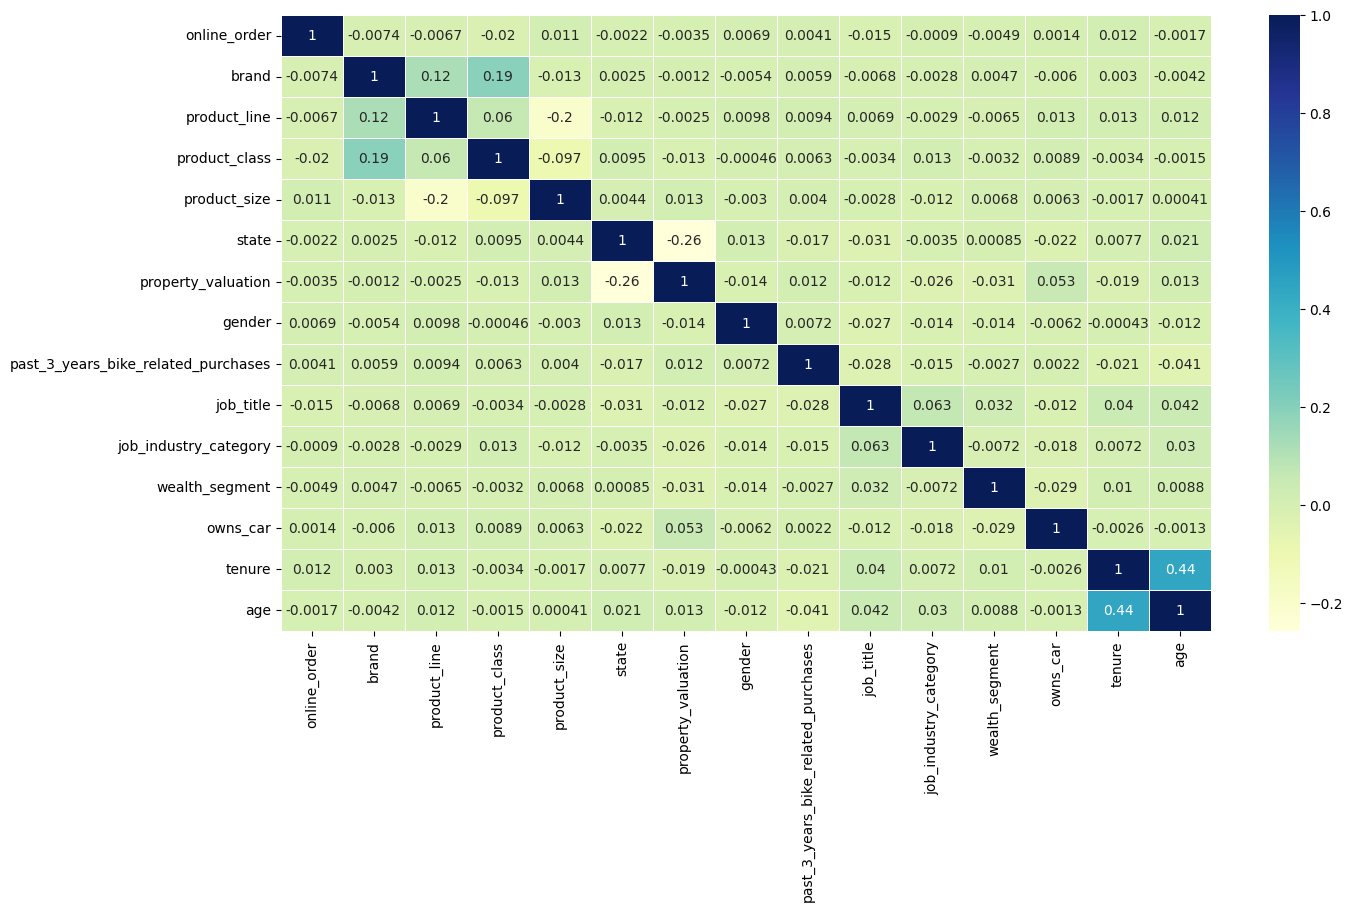

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(d.corr(), annot = True, linewidths=.6, cmap = 'YlGnBu')

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_data, test_data = train_test_split(d, random_state=42, test_size=0.2)

In [40]:
X_train = train_data.drop(['target'], axis=1)
y_train = train_data['target']

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

In [42]:
y_train.value_counts()

Approved     15825
Cancelled    15825
Name: target, dtype: int64

In [43]:
X_test = test_data.drop(['target'], axis=1)
y_test = test_data['target']

In [44]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
scaled_minmax = minmax.fit_transform(X_train)
X_train = pd.DataFrame(scaled_minmax, columns = X_train.columns)
scaled_minmax = minmax.fit_transform(X_test)
X_test = pd.DataFrame(scaled_minmax, columns = X_test.columns)

In [45]:
lr =LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
rfecv = RFECV(estimator=lr, step=1, cv=8)

In [47]:
rfecv.fit(X_train, y_train)
rfecv.support_
print(pd.DataFrame(rfecv.support_,columns=['result']))

    result
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True


In [48]:
predict = lr.predict(X_test)

In [49]:
predict_proba = lr.predict_proba(X_test)[:, 1]
predict_proba

array([0.05001218, 0.11874489, 0.88703874, ..., 0.64145734, 0.13965834,
       0.66228068])

In [50]:
metrics = {
    "f1": f1_score(y_test, predict, pos_label='Cancelled'),
    "recall": recall_score(y_test, predict, pos_label='Cancelled'),
    "precision": precision_score(y_test, predict, pos_label='Cancelled'),
    "ROC_AUC" :roc_auc_score(y_test, predict_proba)}
metrics

{'f1': 0.014736842105263158,
 'recall': 0.19444444444444445,
 'precision': 0.007658643326039387,
 'ROC_AUC': 0.5118736658802382}

In [51]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

    Approved       0.99      0.77      0.87      3956
   Cancelled       0.01      0.19      0.01        36

    accuracy                           0.77      3992
   macro avg       0.50      0.48      0.44      3992
weighted avg       0.98      0.77      0.86      3992

